In [22]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv("./digit-recognizer/train.csv")
test_data = pd.read_csv("digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
test_x = test_data.iloc[:,0:]
trainx,testx,trainy,testy=   train_test_split(X,Y, test_size= 0.25)

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, Y)

RandomForestClassifier()

In [26]:
predictions = rf.predict(test_x)
print(predictions)
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(predictions)+1), 'Label': predictions},)
submission_df.to_csv('./digit-recognizer/submission.csv', index=False)

[2 0 9 ... 3 9 2]


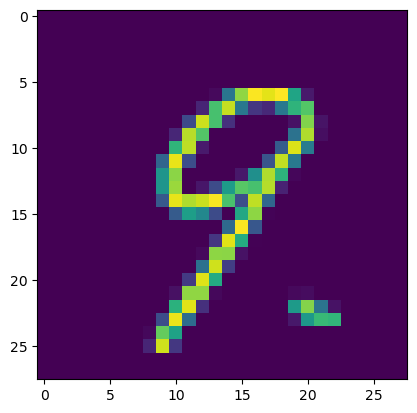

In [27]:
a = test_data.iloc[2,0:].to_numpy()
a = a.reshape(28,28)
plt.imshow(a)

In [28]:
def getAccuracy (leaf_node, train_x, test_x, train_y, test_y):
    rf = RandomForestClassifier(max_leaf_nodes= leaf_node)
    rf.fit(train_x,train_y)
    prediction = rf.predict(test_x)
    RfAccuracy = accuracy_score(test_y, prediction)
    return RfAccuracy


In [34]:
leaf_nodes = np.array([5,15,35,200,300,500,1000,2000,5000,20000])
max = 0
optimal = 0
for i in leaf_nodes:
    test = getAccuracy(i,trainx,testx,trainy,testy)
    print(test)
    if (test > max): 
      optimal = i
      max = test


0.6934285714285714
0.8066666666666666
0.867904761904762
0.9281904761904762
0.9395238095238095
0.9463809523809524
0.955047619047619
0.9595238095238096
0.9628571428571429
0.9625714285714285


In [35]:
max, optimal

(0.9628571428571429, 5000)